 1.Написать класс, реализующий свой линейный классификатор и логистическую регрессию с методами fit и predict.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
class MyLogisticRegression:
  def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
  def fit(self, X_in, y):
        n_samples, n_features = X_in.shape
        self.bias, self.weights = 0, np.zeros(n_features)
        for i in range(self.num_iterations):
           linear_model = np.dot(X_in, self.weights) + self.bias
           sigmoid=1 / (1 + np.exp(-linear_model))
           db = (1 / n_samples) * np.sum(sigmoid - y)
           dw = (1 / n_samples) * np.dot(X_in.T, (sigmoid - y))
           self.weights -= self.learning_rate * dw
           self.bias -= self.learning_rate * db
  def predict(self, X_in_test):
        linear_model =  np.dot(X_in_test, self.weights) + self.bias
        sigmoid = 1 / (1 + np.exp(-linear_model))
        classes = np.array([0 if pred < 0.5 else 1 for pred in sigmoid])

        return classes

Задания 2-3:



Решить задачу с помощью готовых реализаций:
— Логистическая регрессия: sklearn (также мою использую)
— SVM: sklearn
— Решающее дерево: sklearn
— Случайный лес: sklearn
— Градиентный бустинг: sklearn, LightGBM, XGBoost, catboost


 Посчитать метрики precision, recall, F1-меру, accuracy для всех решений, визуализировать confusion matrix (с помощью matplotlib/seaborn/любая другая библиотека для визуализации) также для всех решений.

In [ ]:
df =  pd.read_csv('train.csv')

df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df[(df['RiskScore']<100) & (df['RiskScore']>0)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10272 non-null  object 
 1   Age                         10272 non-null  float64
 2   AnnualIncome                10272 non-null  float64
 3   CreditScore                 9787 non-null   float64
 4   LoanAmount                  9787 non-null   float64
 5   LoanDuration                10272 non-null  float64
 6   MaritalStatus               10272 non-null  object 
 7   NumberOfDependents          10272 non-null  float64
 8   HomeOwnershipStatus         10272 non-null  object 
 9   MonthlyDebtPayments         9787 non-null   float64
 10  CreditCardUtilizationRate   10272 non-null  float64
 11  NumberOfOpenCreditLines     10272 non-null  float64
 12  NumberOfCreditInquiries     10272 non-null  float64
 13  DebtToIncomeRatio           10272 no

In [ ]:
print(df.isnull().sum()) # смотрим на пропуски
misses=(df.isnull().sum()[df.isnull().sum()>0]).index # вытащим список siries с пропусками
df[df[misses].isnull().all(axis=1)] # отсутствующие и есть все 471 - по ним нет данных с их зарплат - удалим

df=df.dropna()



ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   485
LoanAmount                    485
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           485
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             485
LoanPurpose                   485
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        485
TotalAssets                   485
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

In [ ]:
print(df.duplicated().sum())
df=df[df.duplicated() == False ]

455


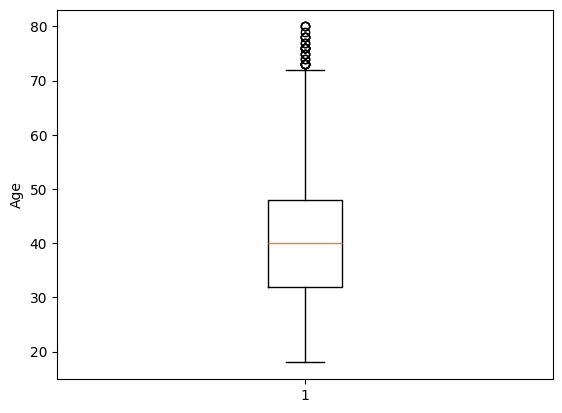

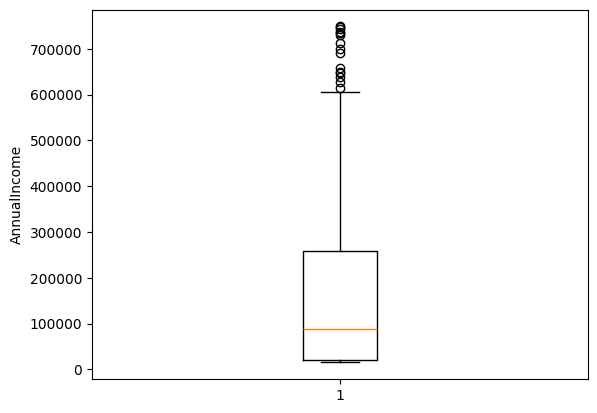

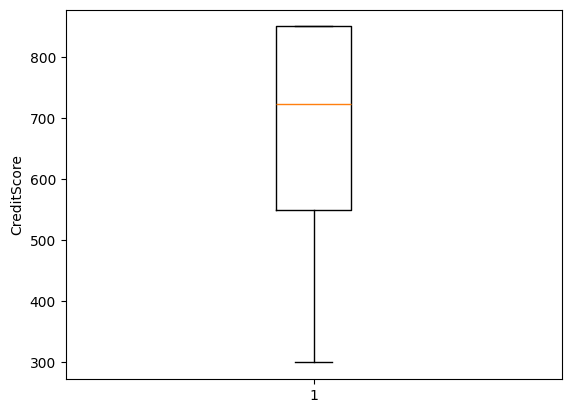

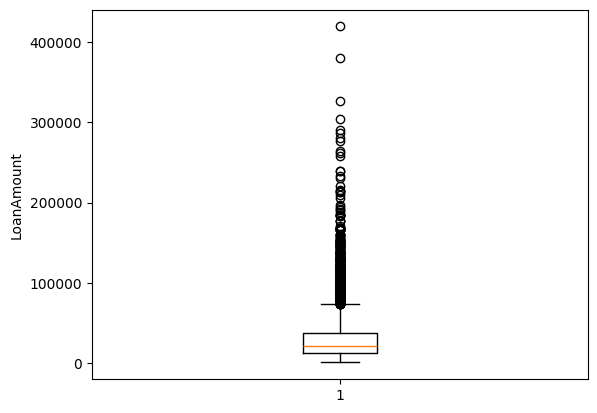

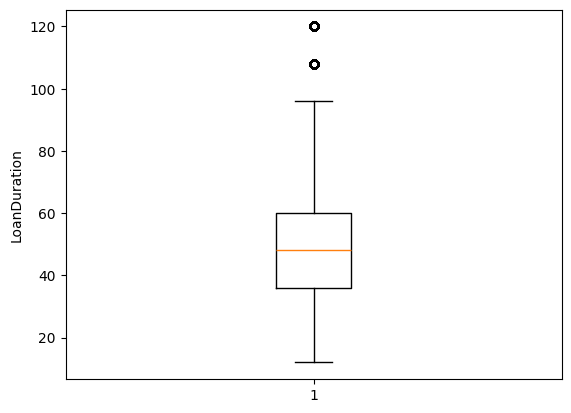

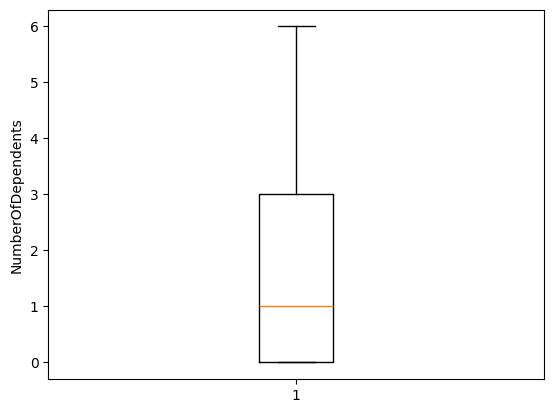

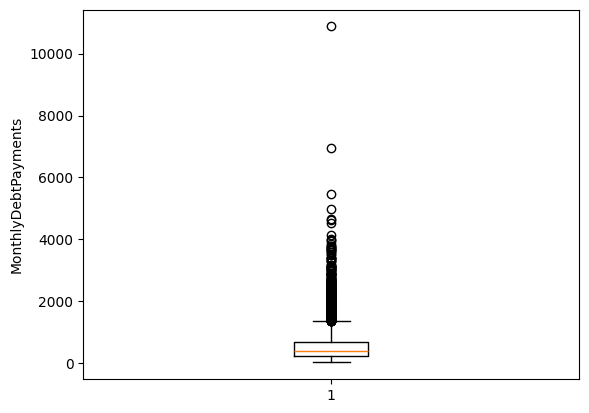

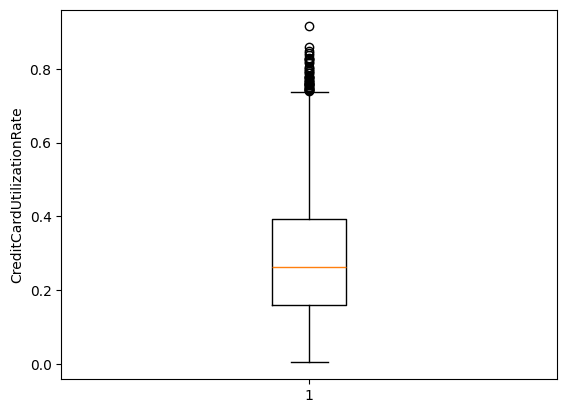

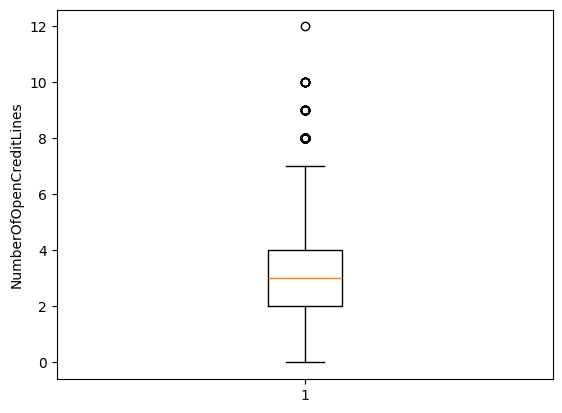

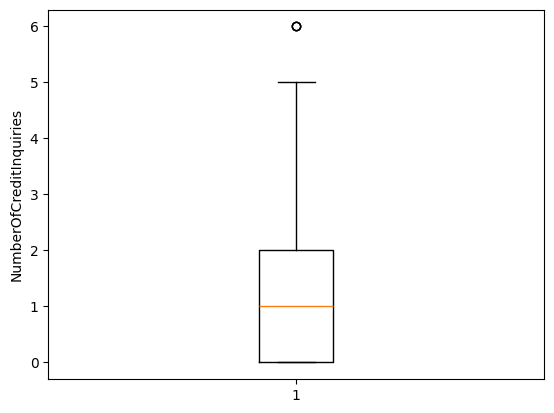

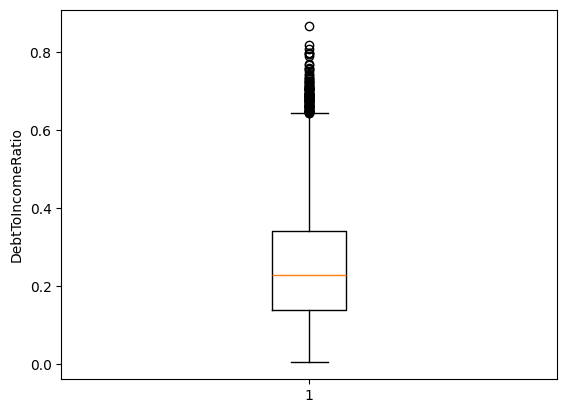

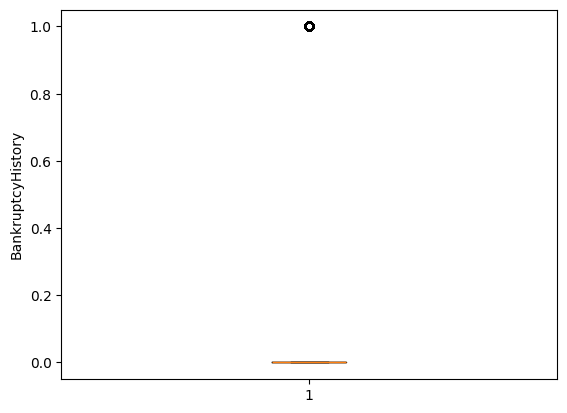

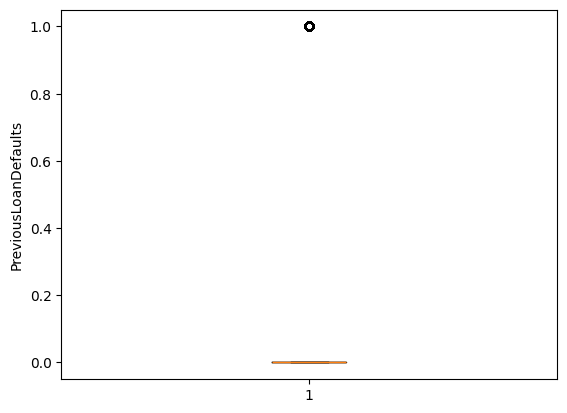

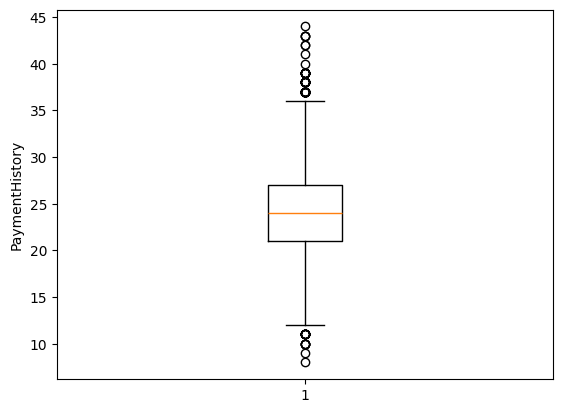

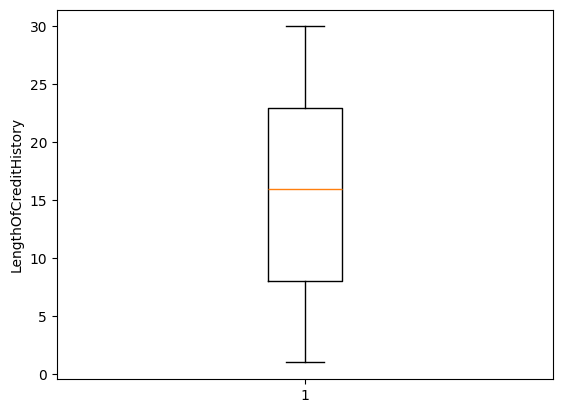

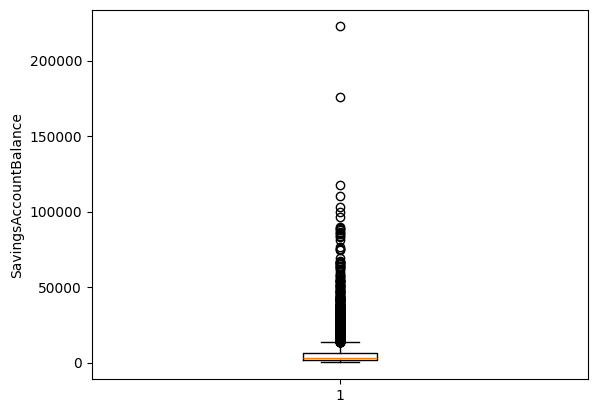

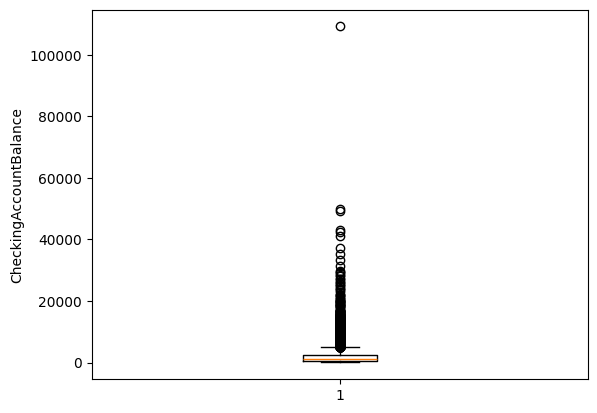

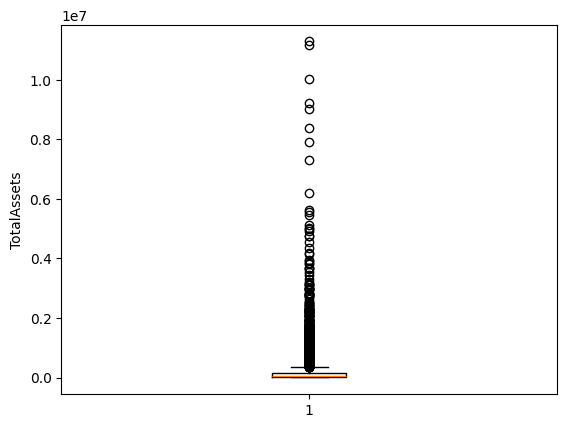

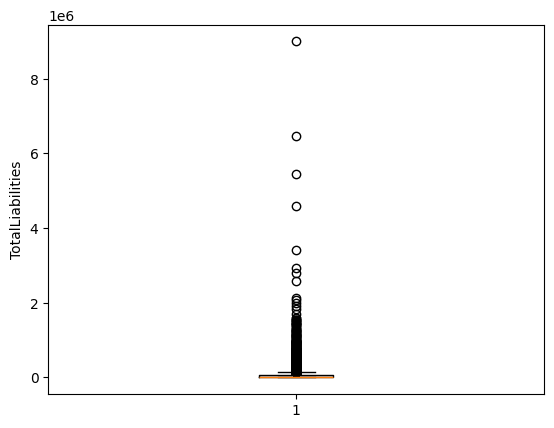

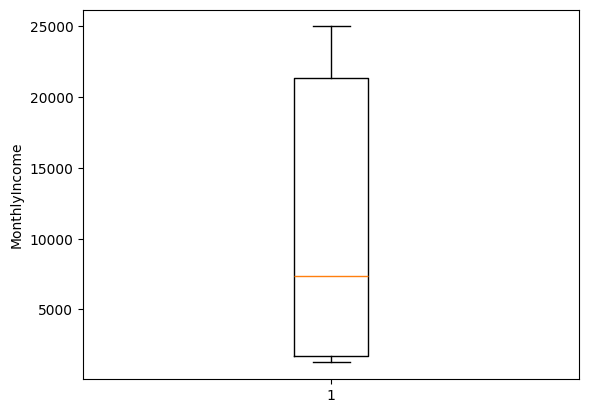

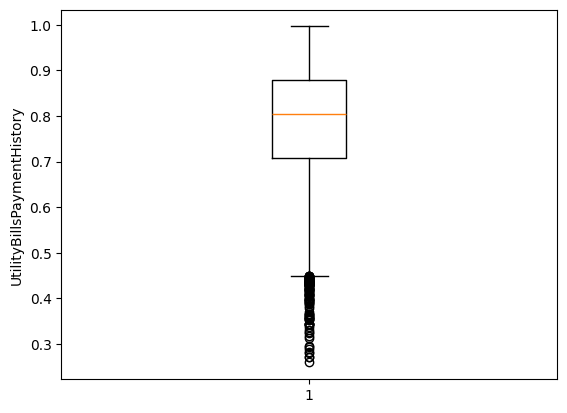

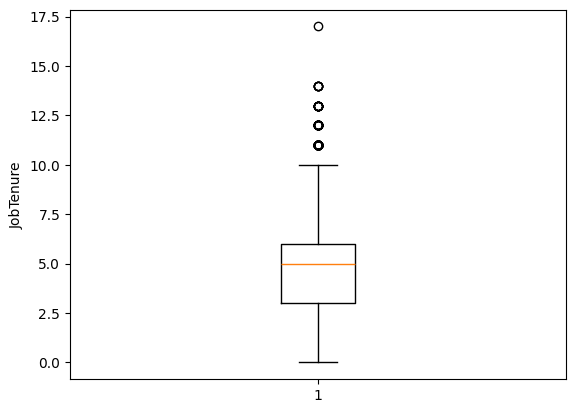

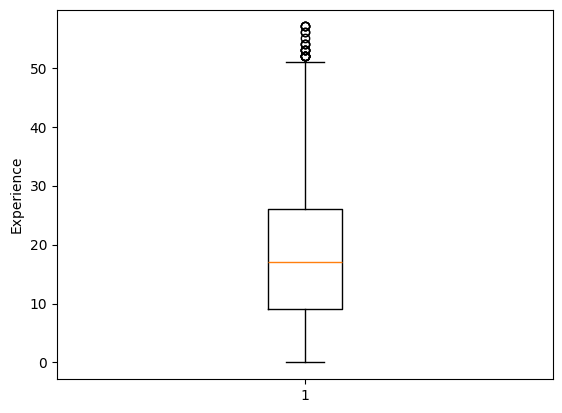

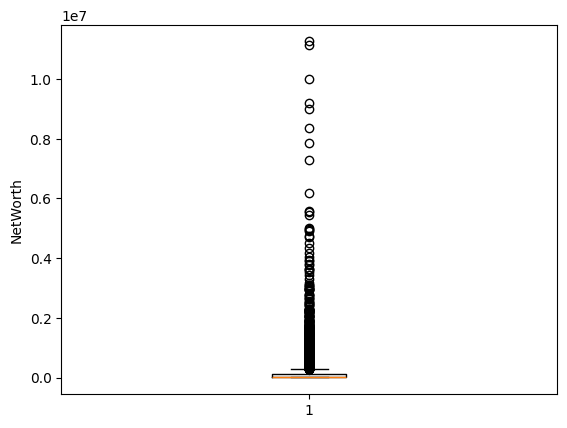

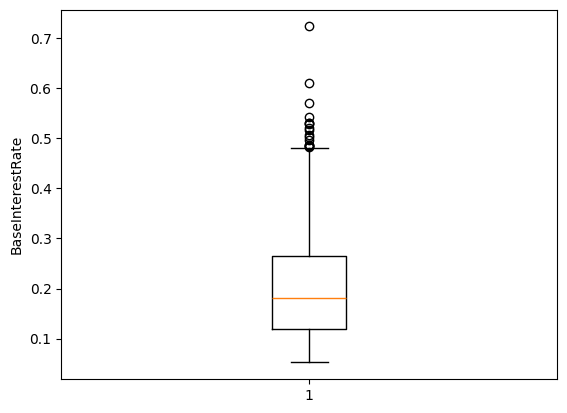

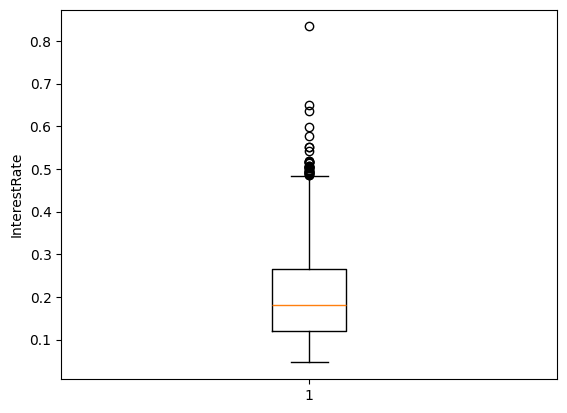

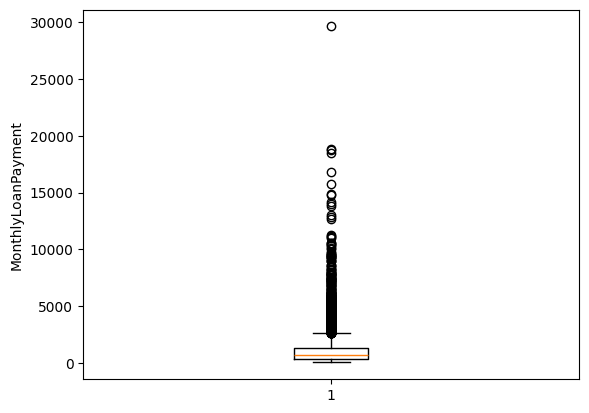

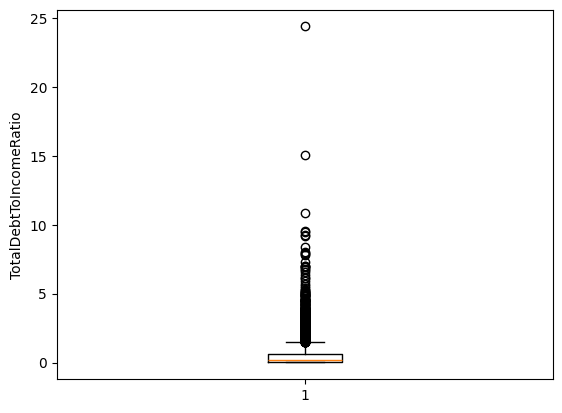

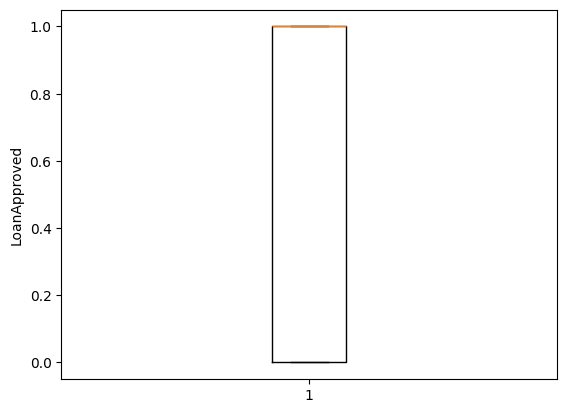

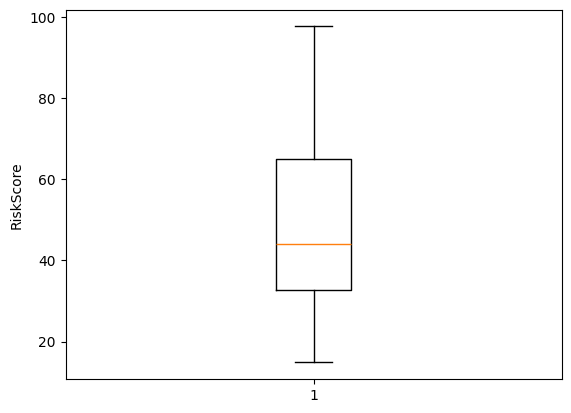

In [ ]:
for collumn in df.columns.tolist():
  if pd.api.types.is_numeric_dtype(df[collumn]):
    plt.boxplot(df[collumn])
    plt.ylabel(collumn)
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9332 non-null   object 
 1   Age                         9332 non-null   float64
 2   AnnualIncome                9332 non-null   float64
 3   CreditScore                 9332 non-null   float64
 4   LoanAmount                  9332 non-null   float64
 5   LoanDuration                9332 non-null   float64
 6   MaritalStatus               9332 non-null   object 
 7   NumberOfDependents          9332 non-null   float64
 8   HomeOwnershipStatus         9332 non-null   object 
 9   MonthlyDebtPayments         9332 non-null   float64
 10  CreditCardUtilizationRate   9332 non-null   float64
 11  NumberOfOpenCreditLines     9332 non-null   float64
 12  NumberOfCreditInquiries     9332 non-null   float64
 13  DebtToIncomeRatio           9332 non-n

In [ ]:
#Кайф, теперь Onehot an LabelEncoding
df.select_dtypes(include=['object']).columns
print(df.select_dtypes(include=['object']).columns)
df = pd.get_dummies(df,columns=['MaritalStatus','HomeOwnershipStatus','EmploymentStatus','LoanPurpose'],drop_first=True)
df

Index(['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus',
       'LoanPurpose', 'EmploymentStatus', 'EducationLevel'],
      dtype='object')


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,...,False,False,False,True,False,False,False,True,False,False
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,...,True,False,False,False,False,False,False,False,True,False
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,...,False,False,False,False,False,False,False,True,False,False
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,...,False,True,False,False,False,False,True,False,False,False
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1986-11-30,31.0,300000.0,850.0,14503.0,60.0,2.0,185.0,0.056431,4.0,...,False,False,False,False,False,False,True,False,False,False
9995,1995-06-09,27.0,15000.0,361.0,19505.0,36.0,1.0,622.0,0.409411,2.0,...,False,True,False,False,False,False,False,True,False,False
9996,2000-03-10,49.0,185082.0,573.0,7447.0,84.0,0.0,946.0,0.095426,0.0,...,False,False,False,False,False,False,False,False,False,False
9997,2010-04-05,55.0,296728.0,850.0,44162.0,84.0,2.0,479.0,0.373804,6.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df=df.drop(columns='RiskScore')

In [ ]:
df=df.drop(columns=['ApplicationDate'])

In [ ]:

y_unscaled=df['LoanApproved']

df=df.drop(columns='LoanApproved')

In [ ]:
le = LabelEncoder()
print(df['EducationLevel'].value_counts())#Посмотрим на то, кто встречается меньше - тот важнее
#LABEL ENCODER ДАЕТ Алфавитный порядок - антибаза.
def transform(x): #переходничек
    if x == 'High School':
        return 'A'
    elif x == 'Bachelor':
        return 'B'
    elif x == 'Associate':
        return 'C'
    elif x == 'Master':
        return 'D'
    elif x == 'Doctorate':
        return 'E'
    else:
        return 'A'
df['EducationLevel']=df['EducationLevel'].apply(transform)

df['EducationLevel']=le.fit_transform(df['EducationLevel'])
#LABEL ENCODER ДАЕТ Алфавитный порядок - антибаза.


EducationLevel
High School    3758
Bachelor       2751
Associate      1836
Master          677
Doctorate       310
Name: count, dtype: int64


In [ ]:
df.info()
scaler_minmax =  StandardScaler()
df_ariphmetic=df.select_dtypes(include=['float64','int64'])
print(df_ariphmetic)
df_other=df.select_dtypes(include=['object', 'bool'])
df_ariphmetic  = pd.DataFrame(scaler_minmax.fit_transform(df_ariphmetic), columns=df_ariphmetic.columns, index=df_ariphmetic.index)
df = pd.concat([df_ariphmetic, df_other], axis=1)
df

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9332 non-null   float64
 1   AnnualIncome                    9332 non-null   float64
 2   CreditScore                     9332 non-null   float64
 3   LoanAmount                      9332 non-null   float64
 4   LoanDuration                    9332 non-null   float64
 5   NumberOfDependents              9332 non-null   float64
 6   MonthlyDebtPayments             9332 non-null   float64
 7   CreditCardUtilizationRate       9332 non-null   float64
 8   NumberOfOpenCreditLines         9332 non-null   float64
 9   NumberOfCreditInquiries         9332 non-null   float64
 10  DebtToIncomeRatio               9332 non-null   float64
 11  BankruptcyHistory               9332 non-null   float64
 12  PreviousLoanDefaults            9332 no

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,-1.111860,-0.558666,-0.736675,-0.458262,0.271045,-0.399683,1.088754,-0.834293,-0.592693,0.020501,...,False,False,False,True,False,False,False,True,False,False
1,1.305009,0.349116,0.981312,-0.501464,-0.712006,-0.399683,-0.667339,-0.685576,-0.017923,-0.991767,...,True,False,False,False,False,False,False,False,True,False
2,0.959742,1.451138,0.981312,0.315946,-0.712006,-1.105025,-0.001851,1.001318,-0.017923,-0.991767,...,False,False,False,False,False,False,False,True,False,False
3,-1.284494,-0.835746,0.964189,-0.388844,-0.220481,-1.105025,-0.782558,-0.605538,2.281157,-0.991767,...,False,True,False,False,False,False,True,False,False,False
4,1.305009,1.451138,0.981312,0.023083,-0.220481,0.305658,0.029933,-0.072460,-0.017923,0.020501,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.766593,1.451138,0.981312,-0.560301,0.271045,0.305658,-0.718989,-1.433705,0.556847,-0.991767,...,False,False,False,False,False,False,True,False,False,False
9995,-1.111860,-1.005403,-1.809704,-0.377165,-0.712006,-0.399683,0.149125,0.780542,-0.592693,0.020501,...,False,True,False,False,False,False,False,True,False,False
9996,0.787109,0.460609,-0.599693,-0.818638,1.254095,-1.105025,0.792761,-1.189089,-1.742233,-0.991767,...,False,False,False,False,False,False,False,False,False,False
9997,1.305009,1.422935,0.981312,0.525589,1.254095,0.305658,-0.134949,0.557179,1.706387,-0.991767,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Вычисление корреляционной матрицы
corr_matrix = df.corr()
# Визуализация матрицы корреляций с помощью тепловой карты
plt.figure(figsize=(120, 80))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
high_corr = corr_matrix[(corr_matrix >= 0.8) & (corr_matrix != 1.)].stack()
print(high_corr)

Age                 Experience            0.982802
AnnualIncome        MonthlyIncome         0.984441
LoanAmount          MonthlyLoanPayment    0.868404
TotalAssets         NetWorth              0.993819
MonthlyIncome       AnnualIncome          0.984441
Experience          Age                   0.982802
NetWorth            TotalAssets           0.993819
BaseInterestRate    InterestRate          0.975215
InterestRate        BaseInterestRate      0.975215
MonthlyLoanPayment  LoanAmount            0.868404
dtype: float64


In [ ]:
df=df.drop(columns=[ 'Age', 'InterestRate', 'TotalAssets', 'LoanAmount','AnnualIncome'], inplace=False)

In [ ]:
y = y_unscaled
df = df.astype({col: 'int' for col in df.select_dtypes(include=['bool']).columns})
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CreditScore                     9332 non-null   float64
 1   LoanDuration                    9332 non-null   float64
 2   NumberOfDependents              9332 non-null   float64
 3   MonthlyDebtPayments             9332 non-null   float64
 4   CreditCardUtilizationRate       9332 non-null   float64
 5   NumberOfOpenCreditLines         9332 non-null   float64
 6   NumberOfCreditInquiries         9332 non-null   float64
 7   DebtToIncomeRatio               9332 non-null   float64
 8   BankruptcyHistory               9332 non-null   float64
 9   PreviousLoanDefaults            9332 non-null   float64
 10  PaymentHistory                  9332 non-null   float64
 11  LengthOfCreditHistory           9332 non-null   float64
 12  SavingsAccountBalance           9332 no

In [ ]:
pipeline = make_pipeline(LogisticRegression())
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,  classification_report

In [ ]:
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.9345794392523364
Recall: 0.9336099585062241
F1 Score: 0.934094447327452
Accuracy: 0.9319582105545138


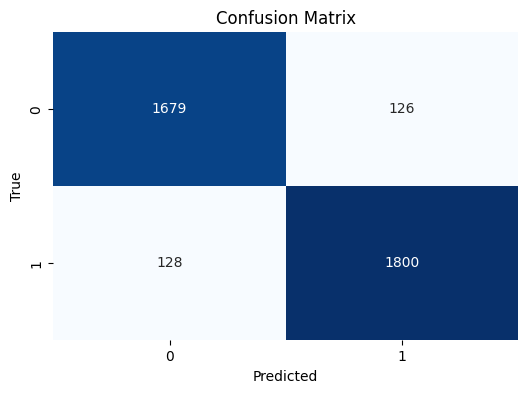

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
#Cделаем функцию для метрик и проверки переобучения
def evaluate_model(y_test,y_pred):
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Accuracy: {accuracy}")
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()




In [ ]:
print("\nClassification Report:\n", classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1805
         1.0       0.93      0.93      0.93      1928

    accuracy                           0.93      3733
   macro avg       0.93      0.93      0.93      3733
weighted avg       0.93      0.93      0.93      3733



In [ ]:
my_log_reg = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
my_log_reg.fit(X_train, y_train)
y_pred_my = my_log_reg.predict(X_test)

Precision: 0.8849467815509376
Recall: 0.9056016597510373
F1 Score: 0.8951550884388618
Accuracy: 0.8904366461291187


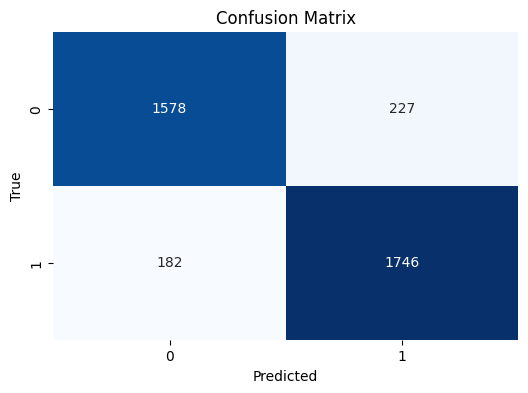

In [ ]:
evaluate_model(y_test,y_pred_my)

Precision: 0.9268547544409613
Recall: 0.9201244813278008
F1 Score: 0.9234773555439875
Accuracy: 0.9212429681221538


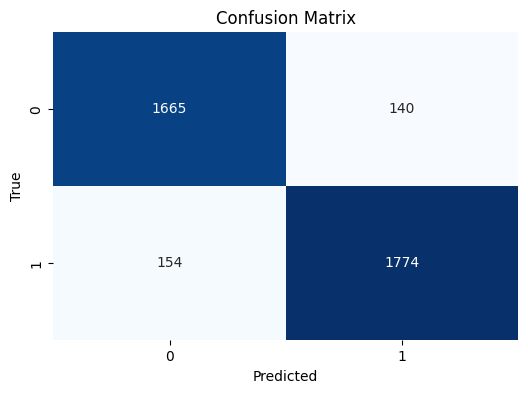

In [ ]:
from sklearn.svm import SVC
svm_pipeline = make_pipeline(SVC())
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
evaluate_model(y_test, y_pred_svm)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test,y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1805
         1.0       0.93      0.92      0.92      1928

    accuracy                           0.92      3733
   macro avg       0.92      0.92      0.92      3733
weighted avg       0.92      0.92      0.92      3733



Precision: 0.8773100616016427
Recall: 0.8864107883817427
F1 Score: 0.8818369453044376
Accuracy: 0.8773104741494776


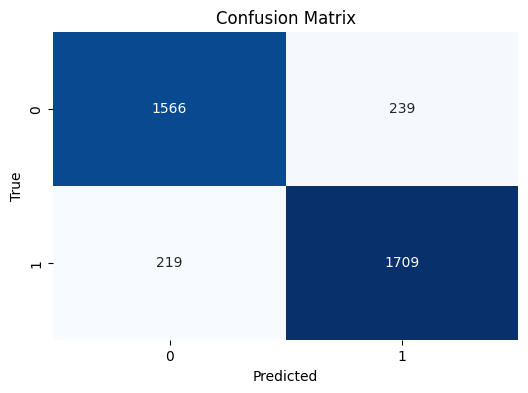

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_pipeline = make_pipeline(DecisionTreeClassifier())
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
evaluate_model(y_test,y_pred_dt)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test,y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1805
         1.0       0.88      0.89      0.88      1928

    accuracy                           0.88      3733
   macro avg       0.88      0.88      0.88      3733
weighted avg       0.88      0.88      0.88      3733



Precision: 0.9088145896656535
Recall: 0.9304979253112033
F1 Score: 0.9195284469502819
Accuracy: 0.9158853469059738


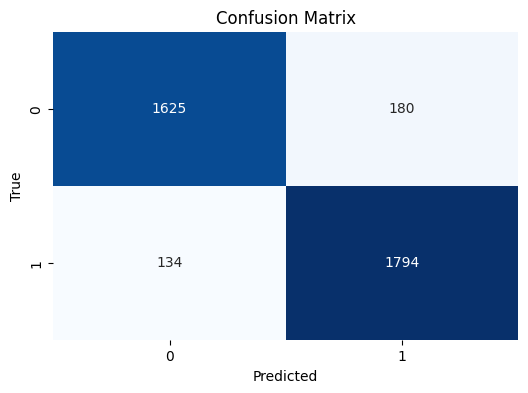

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = make_pipeline(RandomForestClassifier())
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
evaluate_model(y_test,y_pred_rf)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test,y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1805
         1.0       0.91      0.93      0.92      1928

    accuracy                           0.92      3733
   macro avg       0.92      0.92      0.92      3733
weighted avg       0.92      0.92      0.92      3733



Precision: 0.921377183967112
Recall: 0.9299792531120332
F1 Score: 0.9256582343830666
Accuracy: 0.9228502544870077


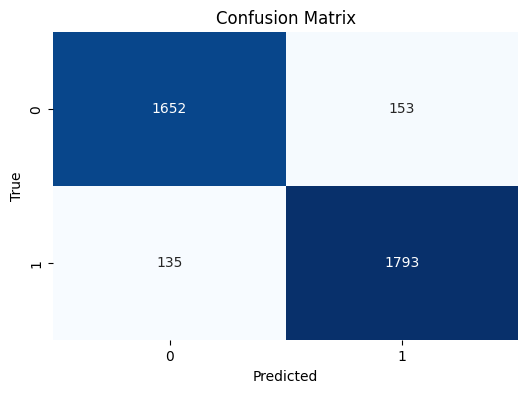

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_pipeline = make_pipeline(GradientBoostingClassifier())
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
evaluate_model(y_test,y_pred_gb)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test,y_pred_gb))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1805
         1.0       0.92      0.93      0.93      1928

    accuracy                           0.92      3733
   macro avg       0.92      0.92      0.92      3733
weighted avg       0.92      0.92      0.92      3733



In [ ]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2861, number of negative: 2738
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3509
[LightGBM] [Info] Number of data points in the train set: 5599, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510984 -> initscore=0.043943
[LightGBM] [Info] Start training from score 0.043943
Precision: 0.9249357326478149
Recall: 0.933091286307054
F1 Score: 0.9289956106377485
Accuracy: 0.9263327082775248


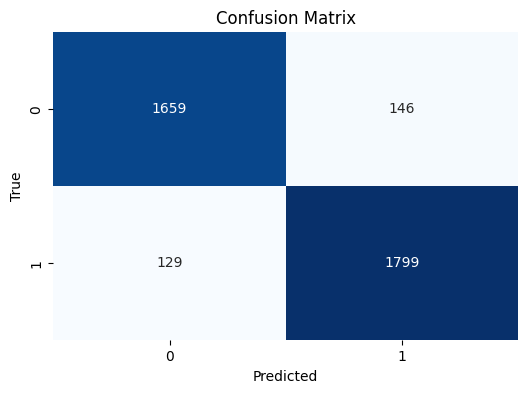

In [ ]:

lgb_pipeline = make_pipeline(lgb.LGBMClassifier())
lgb_pipeline.fit(X_train, y_train)
y_pred_lgb = lgb_pipeline.predict(X_test)
evaluate_model(y_test,y_pred_lgb)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test,y_pred_lgb))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1805
         1.0       0.92      0.93      0.93      1928

    accuracy                           0.93      3733
   macro avg       0.93      0.93      0.93      3733
weighted avg       0.93      0.93      0.93      3733



Precision: 0.9224447868515665
Recall: 0.9315352697095436
F1 Score: 0.9269677419354839
Accuracy: 0.9241896597910527


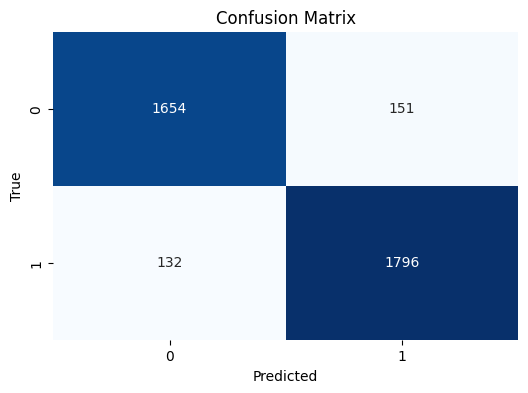

In [ ]:
import xgboost as xgb
xgb_pipeline = make_pipeline(xgb.XGBClassifier())
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
evaluate_model(y_test,y_pred_xgb)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1805
         1.0       0.92      0.93      0.93      1928

    accuracy                           0.92      3733
   macro avg       0.92      0.92      0.92      3733
weighted avg       0.92      0.92      0.92      3733



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
catboost_pipeline = make_pipeline(CatBoostClassifier(iterations=100,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    verbose=50,
    ))
catboost_pipeline.fit(X_train, y_train)
y_pred_catboost = catboost_pipeline.predict(X_test)

0:	learn: 0.5975011	total: 69.3ms	remaining: 6.86s
50:	learn: 0.1473492	total: 968ms	remaining: 930ms
99:	learn: 0.1145908	total: 1.53s	remaining: 0us


Precision: 0.9224049331963001
Recall: 0.9310165975103735
F1 Score: 0.926690758905524
Accuracy: 0.9239217787302437


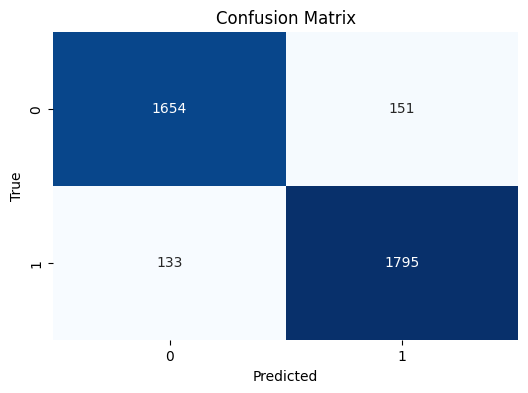

In [ ]:
evaluate_model(y_test,y_pred_catboost)

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_catboost))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1805
         1.0       0.92      0.93      0.93      1928

    accuracy                           0.92      3733
   macro avg       0.92      0.92      0.92      3733
weighted avg       0.92      0.92      0.92      3733



Во славу #подставьте любого бога хаоса из Warhammer# также проверим все наши модели на test.csv, также, как и валидрующая выборка, не использовавшейся для обучения наших моделей(ну, в целом, почему бы и нет).

In [ ]:
dc =  pd.read_csv('test.csv')
dc.info()
#y_pred = pd.concat(dc['ID'],pipeline.predict(dc.drop(columns='ID')))
id_num = dc['ID']
dc =dc.drop(columns='ID')
dc[dc.select_dtypes(include=['int64']).columns]=dc[dc.select_dtypes(include=['int64']).columns].astype('float64')
dc.info()


dc=dc.drop(columns=['ApplicationDate'])


y_table_test=dc['LoanApproved']

dc=dc.drop(columns='LoanApproved')
dc.select_dtypes(include=['object']).columns
print(dc.select_dtypes(include=['object']).columns)
dc = pd.get_dummies(dc,columns=['MaritalStatus','HomeOwnershipStatus','EmploymentStatus','LoanPurpose'],drop_first=True)
dc



le = LabelEncoder()
print(dc['EducationLevel'].value_counts())#Посмотрим на то, кто встречается меньше - тот важнее
#LABEL ENCODER ДАЕТ Алфавитный порядок - антибаза.
def transform(x): #переходничек
    if x == 'High School':
        return 'A'
    elif x == 'Bachelor':
        return 'B'
    elif x == 'Associate':
        return 'C'
    elif x == 'Master':
        return 'D'
    elif x == 'Doctorate':
        return 'E'
    else:
        return 'A'
dc['EducationLevel']=dc['EducationLevel'].apply(transform)

dc['EducationLevel']=le.fit_transform(dc['EducationLevel'])
#LABEL ENCODER ДАЕТ Алфавитный порядок - антибаза.


dc.info()
scaler_minmax = StandardScaler()
dc_ariphmetic=dc.select_dtypes(include=['float64','int64'])
print(dc_ariphmetic)
dc_other=dc.select_dtypes(include=['object', 'bool'])
dc_ariphmetic  = pd.DataFrame(scaler_minmax.fit_transform(dc_ariphmetic), columns=dc_ariphmetic.columns, index=dc_ariphmetic.index)
dc = pd.concat([dc_ariphmetic, dc_other], axis=1)
dc
dc=dc.drop(columns=[ 'Age', 'InterestRate', 'TotalAssets', 'LoanAmount','AnnualIncome'], inplace=False)
dc = dc.astype({col: 'int' for col in dc.select_dtypes(include=['bool']).columns})


y_pred_logreg = pipeline.predict(dc)
y_pred_svm = svm_pipeline.predict(dc)
y_pred_dt = dt_pipeline.predict(dc)
y_pred_rf = rf_pipeline.predict(dc)
y_pred_gb = gb_pipeline.predict(dc)
y_pred_lgb = lgb_pipeline.predict(dc)
y_pred_xgb = xgb_pipeline.predict(dc)
y_pred_catboost = catboost_pipeline.predict(dc)

y_pred_my = my_log_reg.predict(dc)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

Precision: 0.9412228796844182
Recall: 0.9244478884153429
F1 Score: 0.9327599687255669
Accuracy: 0.9312


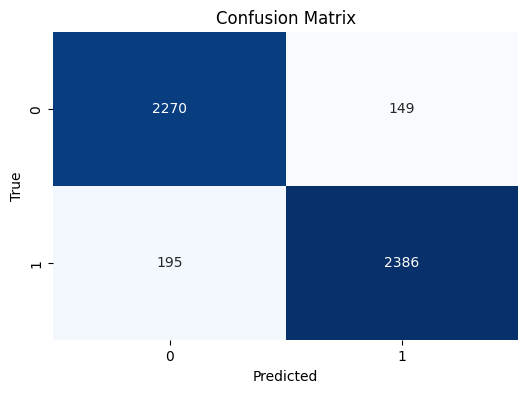

In [ ]:
evaluate_model(y_table_test,y_pred_logreg)

Precision: 0.8931008339651251
Recall: 0.9128244866330879
F1 Score: 0.902854953056141
Accuracy: 0.8986


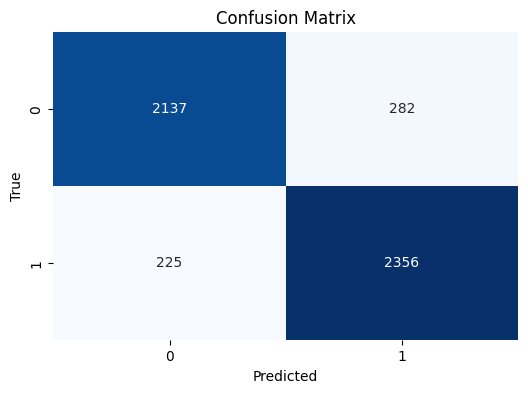

In [ ]:
evaluate_model(y_table_test,y_pred_my) #=(

Precision: 0.9333596214511041
Recall: 0.9170864006199148
F1 Score: 0.9251514559312097
Accuracy: 0.9234


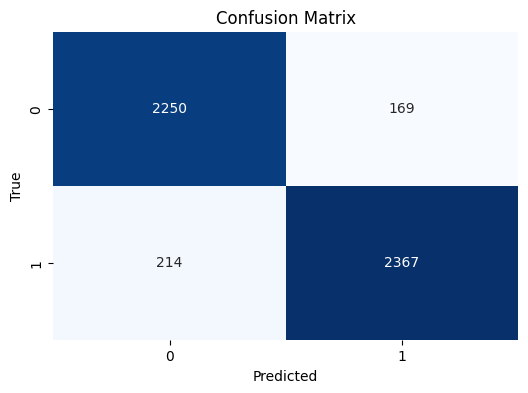

In [ ]:
evaluate_model(y_table_test,y_pred_svm)

Precision: 0.8751123090745733
Recall: 0.7547462223944208
F1 Score: 0.810484709798211
Accuracy: 0.8178


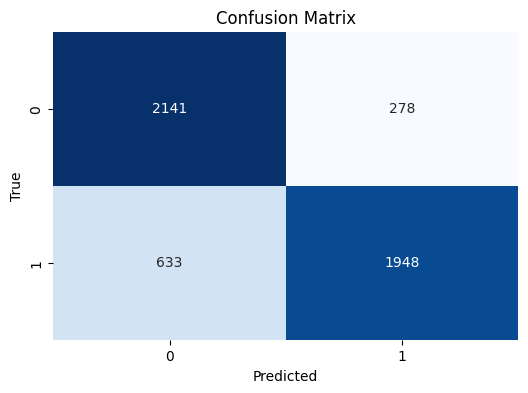

In [ ]:
evaluate_model(y_table_test,y_pred_dt)

Precision: 0.9263034104272834
Recall: 0.9155366137156141
F1 Score: 0.9208885424785659
Accuracy: 0.9188


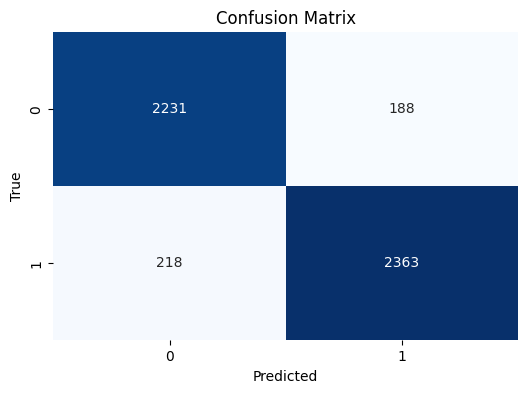

In [ ]:
evaluate_model(y_table_test,y_pred_rf)

Precision: 0.9348598499802606
Recall: 0.9174738473459899
F1 Score: 0.9260852561595619
Accuracy: 0.9244


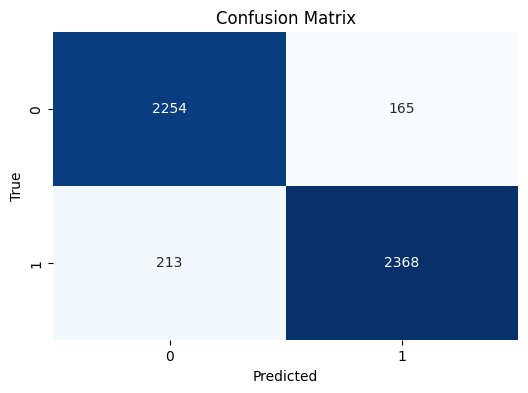

In [ ]:
evaluate_model(y_table_test,y_pred_gb)

Precision: 0.9313764379214597
Recall: 0.9097249128244866
F1 Score: 0.9204233633869071
Accuracy: 0.9188


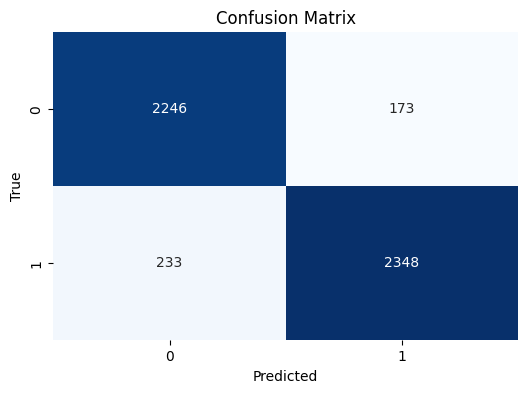

In [ ]:
evaluate_model(y_table_test,y_pred_lgb)

Precision: 0.9085434700790365
Recall: 0.9352963967454475
F1 Score: 0.9217258495609011
Accuracy: 0.918


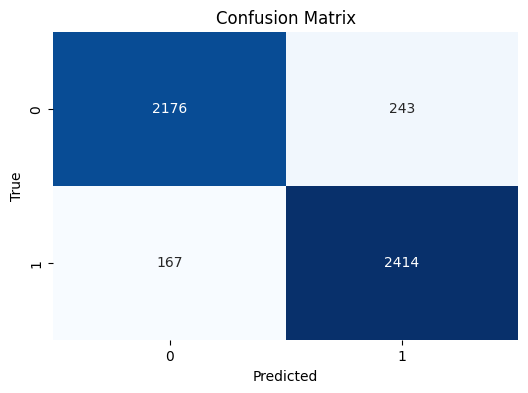

In [ ]:
evaluate_model(y_table_test,y_pred_xgb)

Precision: 0.9369085173501577
Recall: 0.9205734211545913
F1 Score: 0.9286691420754348
Accuracy: 0.927


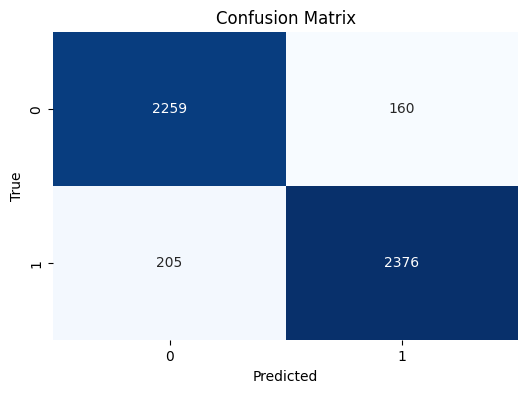

In [ ]:
evaluate_model(y_table_test,y_pred_catboost)

***Проанализируем полученные результат:***

Для предсказания мы использовали 9 различных моделей:

1. Logictic Regression(sklearn)
2. LogisticRegression(моя)
3. Support Vector Classification(метод опорных векторов для классификации)(sklearn)
4. Решающее дерево(sklearn)
5. Случайный лес(sklearn)
6. Градиентный бустинг(sklearn)
7. Градиентный бустинг(LightGBM)
8. Градиентный бустинг(XGBoost)
9. Градиентный бустинг(catboost)


При анализе обоих вариционных датасетов(большого(test.csv) и малого( тестовая выборка train.csv)) можно было заметить как схожие элементы, так и некие особенности, связанные с качеством предсказаний моделей. Так, можно заметить, что в обоих случиях, для бинарной классификации лидером оказалась Логистическая регрессия(skylearn) лучше всего показала себя по сравнению с другими методами, если смотреть на все метрики, что может говорить о линейной разделимости нашего датасета, что обосновывает менее удачные результаты конкурирующих моделей. В то же время наихудшей моделью будет Решающее дерево, что показало наименьшие значения всех метрик. Этому способствовала та же линейная разделимость, а также то, что при его обучении не было выставлено ограничение глубины , и оно слегка переобучилось, подстроившись под тренировочные данные( о чем свидетельствует уменьшение полноты на 13%). Остальные же модели при базовых настройках показали себя достаточно достойно, но все же можно говорить о том, что, смотря на F1 меру и точность, что Случайный лес,SVC, и LGB/XGB показали данные чуть хуже, чем  catboost, что говорит о том, что последний лучше находит линейную зависимость данных, в отличие от других моделей. Также можно заметить, что Lgb имеет большую точность на больших данных, по сравнению с XGB, но меньшую полноту. Из этого можно сделать вывод, что level-wise стратегия при применении к линейно разделимым данным в основном влияет на точность предсказаний, в то время как XGB с регуляризацией листьев позволяет обучать более полные амсамбли. Но из всех бустингов лучше все же оказался именно catboost за счет своей алгоритмических оптимизаций, что практически сравнялся с Logictic Regression на данном датасете, что может говорить об универсальности этого метода или об оптимальности при подозрении на линейную разделимость.

Коротко скажем и об используемых метриках: в целом эффективность моделей хорошо классифицировали как F1-мера, так и точность,но для более детального анализа результатов работы схожих по этим метрикам моделей нам требовались так же и recoll с perssion. Confusion matrix также была не лишней и позволяла оценить то, что модель не врет, выкидывая случайные предсказаний или имея перекос в 1 из сторон, что может говорить о неправильной обработке данных или неудачном подборе гиперпараметров, без построения ROC-кривой.